# **Zomato Data Analysis Project**


# Step 1 - Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

# Step 2 - Create the Data frame

In [ ]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [ ]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


#  Step 3 - Convert the Data type of 'rate' column

In [ ]:
def handleRate(value):
  value =str(value).split('/')
  value = value[0]
  return float(value)

dataframe['rate'] =dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


#Step 4 - Basic Data Info

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Step 5 - Data Cleaning

In [ ]:
# Handle missing values in 'rate' column if any
dataframe.dropna(subset=['rate'], inplace=True)


In [ ]:
# Mapping 'online_order' and 'book_table' columns to numerical values
dataframe['online_order'] = dataframe['online_order'].map({'Yes': 1, 'No': 0})
dataframe['book_table'] = dataframe['book_table'].map({'Yes': 1, 'No': 0})

# Conclusion: Missing values in the 'rate' column are handled. 'online_order' and 'book_table' columns are mapped to 1 (Yes) and 0 (No) for easier analysis.

In [ ]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,1,4.1,775,800,Buffet
1,Spice Elephant,1,0,4.1,787,800,Buffet
2,San Churro Cafe,1,0,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,300,Buffet
4,Grand Village,0,0,3.8,166,600,Buffet


#  Step 6 - Type of Restaurant(Bar Plot)

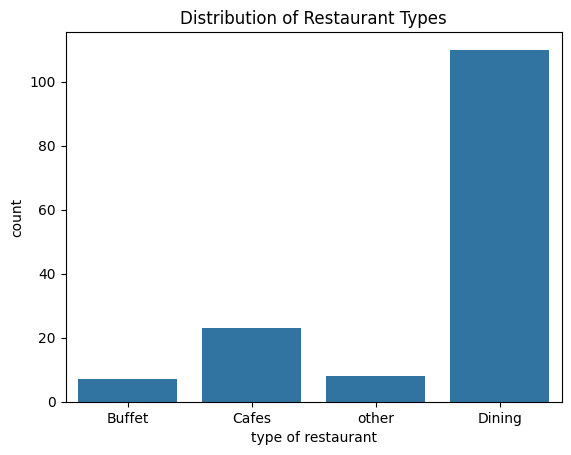

In [ ]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel('type of restaurant')
plt.title('Distribution of Restaurant Types')
plt.show()

# Conclusion -majority of  restaurant fall in the dining category


In [ ]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,1,4.1,775,800,Buffet
1,Spice Elephant,1,0,4.1,787,800,Buffet
2,San Churro Cafe,1,0,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,300,Buffet
4,Grand Village,0,0,3.8,166,600,Buffet


#  Step 7 - Votes by Restaurant Type (Line Plot)

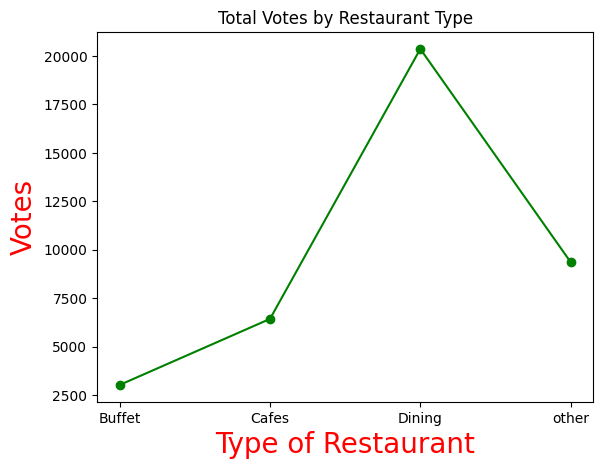

In [ ]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of Restaurant",c="red", size=20)
plt.ylabel("Votes",c="red",size=20)
plt.title("Total Votes by Restaurant Type")
plt.show()

#Conclusion: Dining restaurants have received the maximum votes

In [ ]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,1,4.1,775,800,Buffet
1,Spice Elephant,1,0,4.1,787,800,Buffet
2,San Churro Cafe,1,0,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,300,Buffet
4,Grand Village,0,0,3.8,166,600,Buffet


# Step 8 - Ratings Distribution (Histogram)

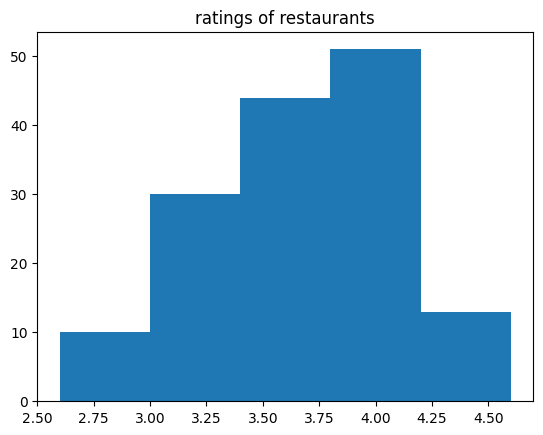

In [ ]:
plt.hist(dataframe['rate'],bins=5)
plt.title("ratings of restaurants")

plt.show()

# Conclusion - the majority restaurants received ratings from 3.5 to 4

In [ ]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,1,4.1,775,800,Buffet
1,Spice Elephant,1,0,4.1,787,800,Buffet
2,San Churro Cafe,1,0,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,300,Buffet
4,Grand Village,0,0,3.8,166,600,Buffet


# Step 9 - Approximate Cost for Two People (Bar Plot)

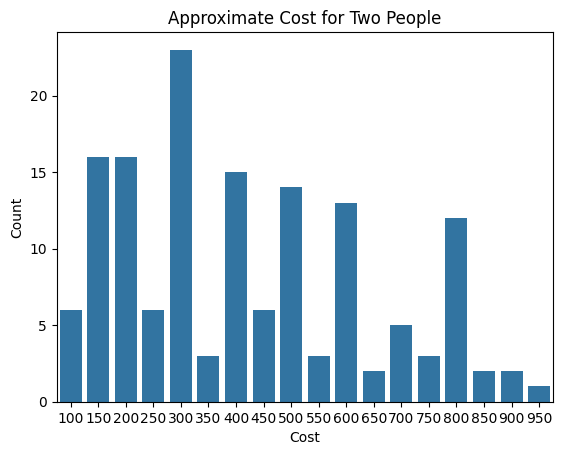

In [ ]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.title("Approximate Cost for Two People")
plt.xlabel("Cost")
plt.ylabel("Count")
plt.show()


# Conclusion -the majority of couple preferr restaurants with an approximate cost of 300 rupees

In [ ]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,1,4.1,775,800,Buffet
1,Spice Elephant,1,0,4.1,787,800,Buffet
2,San Churro Cafe,1,0,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,300,Buffet
4,Grand Village,0,0,3.8,166,600,Buffet


# Step 10 - Rating vs Online Order (Box Plot)

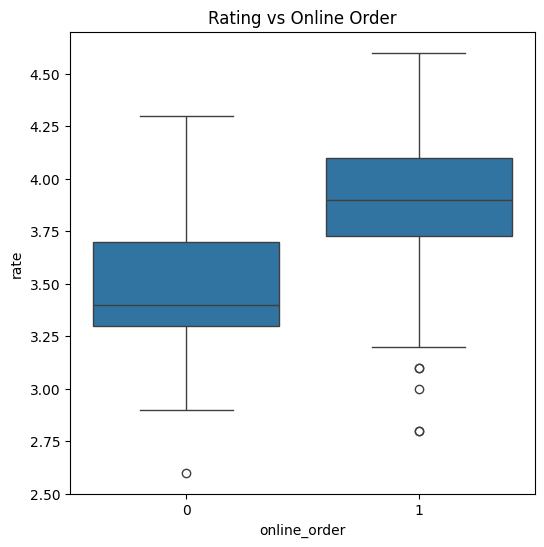

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order',y ='rate',data =dataframe)
plt.title("Rating vs Online Order")
plt.show()

# Conclusion - offline order received lower rating in comparison to online order

#  Step 11 - Pivot Table Heatmap

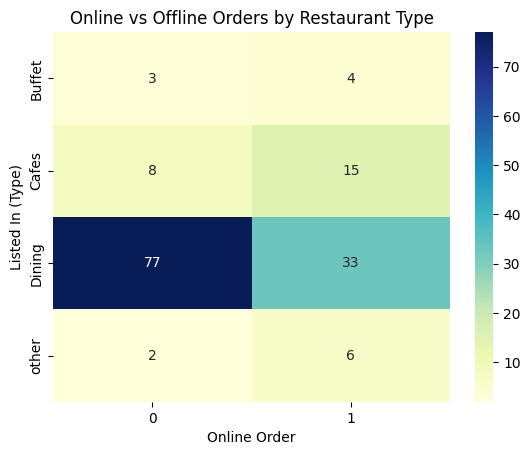

In [ ]:
pivot_table =dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Online vs Offline Orders by Restaurant Type")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

# Conclusion: Dining restaurants primarily accept offline order, wheareas cafes primarily receive online orders. This suggests that clients preferred orders in person at restaurants , but prefer online ordering at cafes

# **Regression: Predicting Restaurant Rating**

# Step 12 - Data Preparation for Regression

In [ ]:
# Convert 'approx_cost(for two people)' to string type before applying str methods
dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].astype(str).str.replace(',', '').astype(float)


In [ ]:
# Selecting features (votes, online_order, book_table, approx_cost) and target (rate)
X = dataframe[['votes', 'online_order', 'book_table', 'approx_cost(for two people)']]
y = dataframe['rate']

# Conclusion: The relevant features and target (restaurant rating) are selected for regression analysis.


# Step 13 - Train-Test Split for Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Step 14 - Train Regression Model (Linear Regression)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Step 15 - Predict and Evaluate Regression Model

In [ ]:
# Convert y_test to numeric, mirroring the process you used for y_train


y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Results:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Regression Results:
Mean Squared Error: 0.17482025876864235
R-squared: 0.18035927853835132


#Conclusion: The Linear Regression model has a Mean Squared Error of 0.1748 and an R-squared value of 0.1804, indicating the model has limited predictive power.

# **Classification: Predicting Online Order Option**

# Step 16 - Data Preparation for Classification

In [ ]:
# Features: votes, rate, approx_cost, book_table | Target: online_order
X = dataframe[['votes', 'rate', 'approx_cost(for two people)', 'book_table']]
y = dataframe['online_order']

# Step 17 - Train-Test Split for Classification

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 18 - Train Classification Model (Random Forest Classifier)

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

#  Step 19 - Predict and Evaluate Classification Model

In [ ]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Classification Results:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Results:
Accuracy: 0.6333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.75      0.69        16
           1       0.64      0.50      0.56        14

    accuracy                           0.63        30
   macro avg       0.63      0.62      0.62        30
weighted avg       0.63      0.63      0.63        30

Confusion Matrix:
 [[12  4]
 [ 7  7]]


# Conclusion: The Random Forest Classifier achieves an accuracy of 63.3%. The classification report shows detailed performance metrics for predicting online orders, and the confusion matrix shows the model's correct and incorrect predictions.